# **REGRESSION MODELS**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
df = pd.read_csv('../Data/clean_data.csv')

In [44]:
# Split the dataset into features (X) and the target variable (Y).
X = df.drop(columns = ['No', 'Price', 'Price_per_sqm'])
y = df['Price']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# Split dataset into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

### **Linear Regression**

In [46]:
# Định nghĩa lớp LinearRegressionCustom

class LinearRegressionCustom:
    # Khởi tạo lớp với tham số fit_intercept (mặc định là True)
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept

    # Hàm fit để huấn luyện mô hình
    def fit(self, X, y):
        # Nếu fit_intercept là True, thêm cột 1 vào X để tính hệ số intercept
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]
        # Tính toán hệ số hồi quy bằng công thức hồi quy tuyến tính
        self.coef_ = np.linalg.inv(X.T @ X) @ X.T @ y

    # Hàm predict để dự đoán giá trị
    def predict(self, X):
        # Nếu fit_intercept là True, thêm cột 1 vào X để tính hệ số intercept
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]
        # Tính toán giá trị dự đoán
        return X @ self.coef_


In [47]:
linear_custom = LinearRegressionCustom(fit_intercept = True)
linear_custom.fit(X_train, y_train)

In [48]:
y_test_pred_custom = linear_custom.predict(X_test)

In [49]:
print("Custom Linear Regression - MSE:", mean_squared_error(y_test, y_test_pred_custom))
print("Custom Linear Regression - MAE:", mean_absolute_error(y_test, y_test_pred_custom))
print("Custom Linear Regression - R^2:", r2_score(y_test, y_test_pred_custom))

Custom Linear Regression - MSE: 18.39119785169373
Custom Linear Regression - MAE: 2.562494834607474
Custom Linear Regression - R^2: 0.7593353254119808


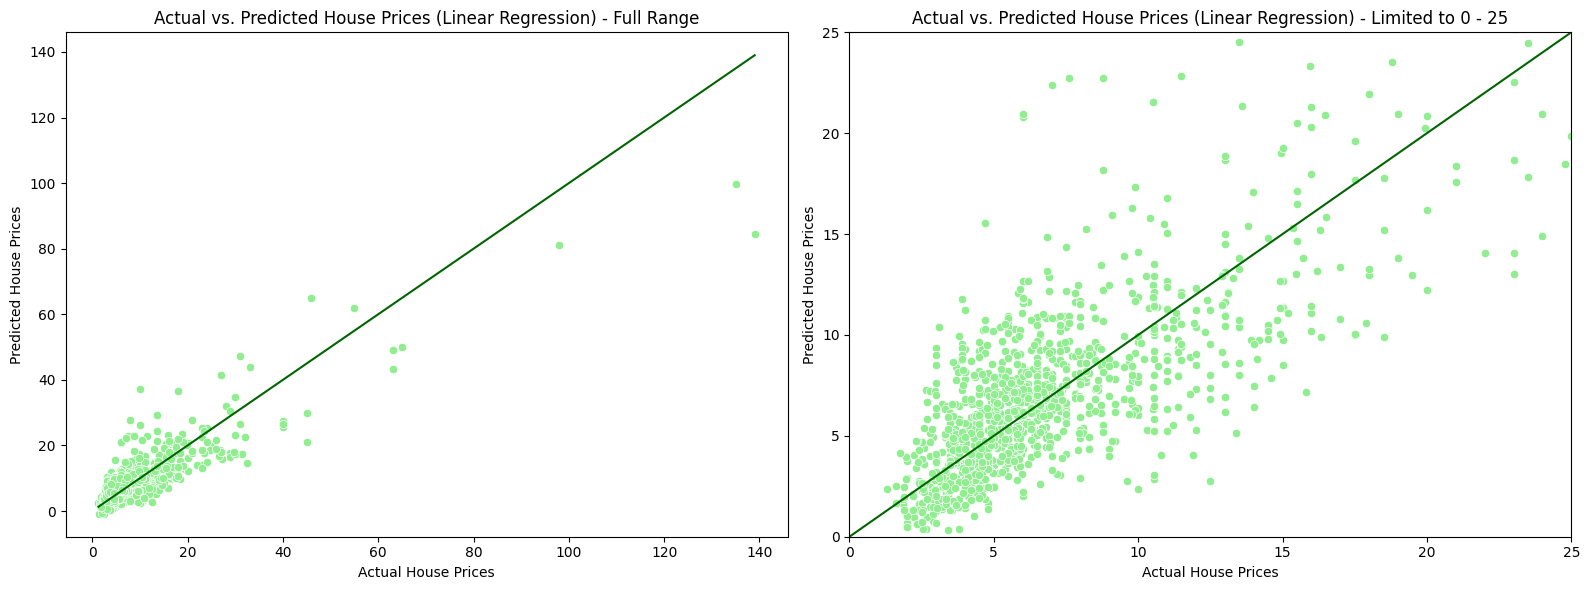

In [50]:
# Tạo figure và các axes cho hai biểu đồ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ toàn bộ dữ liệu
sns.scatterplot(x=y_test, y=y_test_pred_custom, color='lightgreen', ax=ax1)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='darkgreen', linestyle='-')
ax1.set_title('Actual vs. Predicted House Prices (Linear Regression) - Full Range')
ax1.set_xlabel('Actual House Prices')
ax1.set_ylabel('Predicted House Prices')
ax1.grid(False)

# Biểu đồ giới hạn từ 0 tới 20
sns.scatterplot(x=y_test, y=y_test_pred_custom, color='lightgreen', ax=ax2)
ax2.plot([0, 25], [0, 25], color='darkgreen', linestyle='-')
ax2.set_title('Actual vs. Predicted House Prices (Linear Regression) - Limited to 0 - 25')
ax2.set_xlabel('Actual House Prices')
ax2.set_ylabel('Predicted House Prices')
ax2.set_xlim(0, 25)
ax2.set_ylim(0, 25)
ax2.grid(False)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


### **Ridge Regression**

In [51]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [52]:
ridge_y_pred = ridge.predict(X_test)

print("Ridge Regression - MSE:", mean_squared_error(y_test, ridge_y_pred))
print("Ridge Regression - MAE:", mean_absolute_error(y_test, ridge_y_pred))
print("Ridge Regression - R^2:", r2_score(y_test, ridge_y_pred))

Ridge Regression - MSE: 18.39204295562564
Ridge Regression - MAE: 2.5622278975329005
Ridge Regression - R^2: 0.7593242664986676


In [53]:
# Ridge Regression với GridSearchCV
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_y_pred_best = best_ridge.predict(X_test)

print("Best Ridge Regression - MSE:", mean_squared_error(y_test, ridge_y_pred_best))
print("Best Ridge Regression - MAE:", mean_absolute_error(y_test, ridge_y_pred_best))
print("Best Ridge Regression - R^2:", r2_score(y_test, ridge_y_pred_best))

Best Ridge Regression - MSE: 18.498624273790746
Best Ridge Regression - MAE: 2.5373678803393993
Best Ridge Regression - R^2: 0.7579295580919498


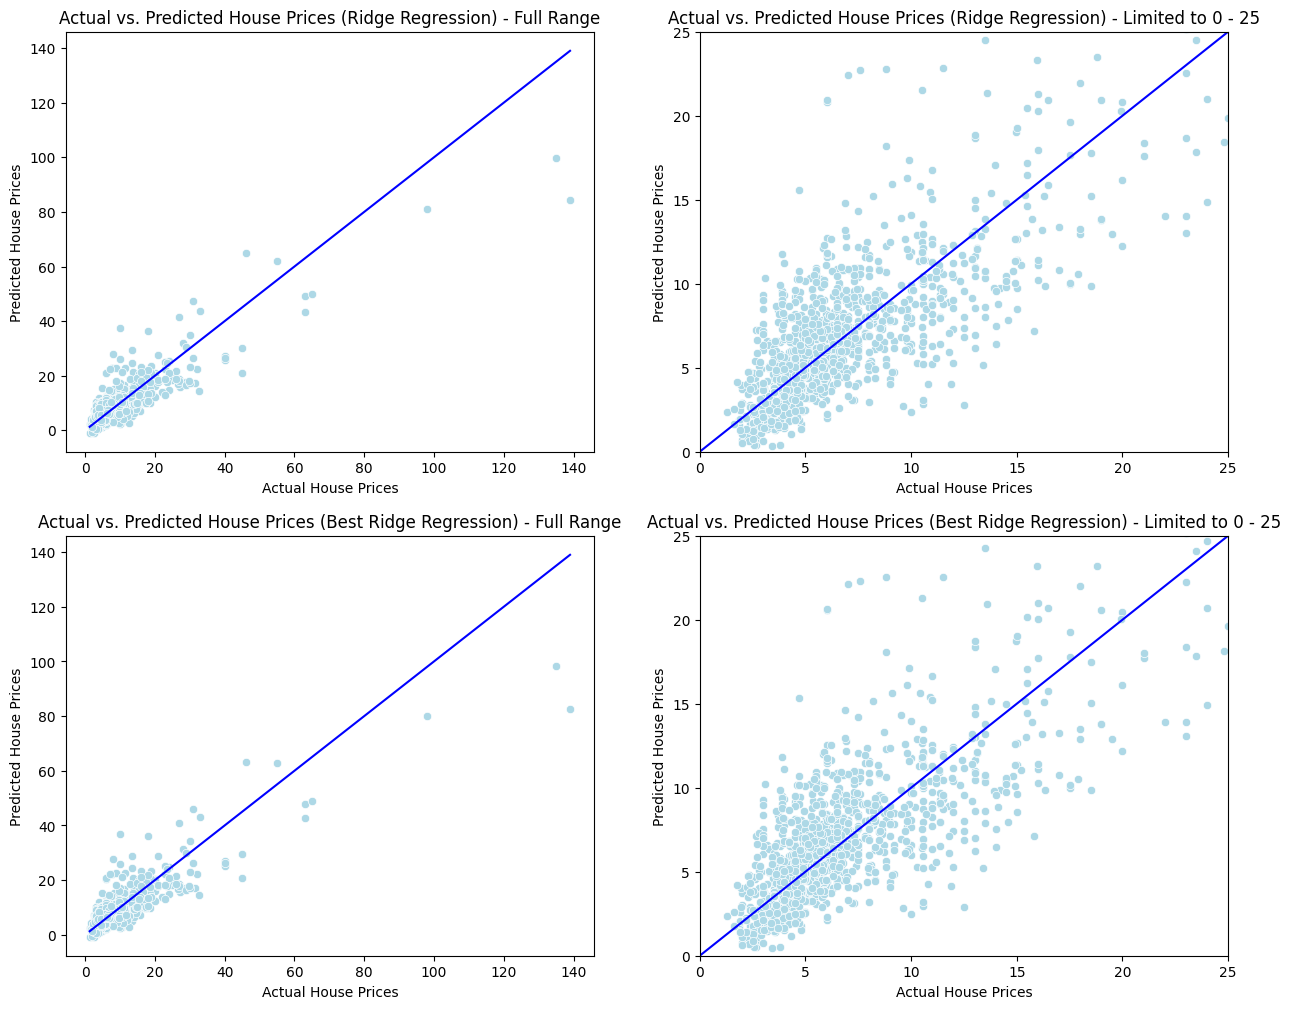

In [54]:
# Create a scatter plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot for Ridge Regression full range
sns.scatterplot(x = y_test, y = ridge_y_pred, color = 'lightblue', ax=axes[0,0])
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'blue', linestyle = '-')
axes[0,0].set_title('Actual vs. Predicted House Prices (Ridge Regression) - Full Range')
axes[0,0].set_xlabel('Actual House Prices')
axes[0,0].set_ylabel('Predicted House Prices')
axes[0,0].grid(False)

# Plot for Ridge Regression limited 
sns.scatterplot(x = y_test, y = ridge_y_pred, color = 'lightblue', ax=axes[0,1])
axes[0,1].plot([0, 25], [0, 25], color = 'blue', linestyle = '-')
axes[0,1].set_title('Actual vs. Predicted House Prices (Ridge Regression) - Limited to 0 - 25')
axes[0,1].set_xlabel('Actual House Prices')
axes[0,1].set_ylabel('Predicted House Prices')
axes[0,1].set_xlim(0, 25)
axes[0,1].set_ylim(0, 25)
axes[0,1].grid(False)


# Plot for Best Ridge Regression full range
sns.scatterplot(x = y_test, y = ridge_y_pred_best, color = 'lightblue', ax=axes[1,0])
axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'blue', linestyle = '-')
axes[1,0].set_title('Actual vs. Predicted House Prices (Best Ridge Regression) - Full Range')
axes[1,0].set_xlabel('Actual House Prices')
axes[1,0].set_ylabel('Predicted House Prices')
axes[1,0].grid(False)

# Plot for Best Ridge Regression limited
sns.scatterplot(x = y_test, y = ridge_y_pred_best, color = 'lightblue', ax=axes[1,1])
axes[1,1].plot([0, 25], [0, 25], color = 'blue', linestyle = '-')
axes[1,1].set_title('Actual vs. Predicted House Prices (Best Ridge Regression) - Limited to 0 - 25')
axes[1,1].set_xlabel('Actual House Prices')
axes[1,1].set_ylabel('Predicted House Prices')
axes[1,1].set_xlim(0, 25)
axes[1,1].set_ylim(0, 25)
axes[1,1].grid(False)


plt.grid(False)
plt.show()

### **Lasso Regression**

In [55]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [56]:
lasso_y_pred = lasso.predict(X_test)

print("Lasso Regression - MSE:", mean_squared_error(y_test, lasso_y_pred))
print("Lasso Regression - MAE:", mean_absolute_error(y_test, lasso_y_pred))
print("Lasso Regression - R^2:", r2_score(y_test, lasso_y_pred))

Lasso Regression - MSE: 20.68743590713861
Lasso Regression - MAE: 2.480775042301144
Lasso Regression - R^2: 0.7292870714131594


In [57]:
# Lasso Regression với GridSearchCV
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_y_pred_best = best_lasso.predict(X_test)

print("Best Lasso Regression - MSE:", mean_squared_error(y_test, lasso_y_pred_best))
print("Best Lasso Regression - MAE:", mean_absolute_error(y_test, lasso_y_pred_best))
print("Best Lasso Regression - R^2:", r2_score(y_test, lasso_y_pred_best))


Best Lasso Regression - MSE: 18.413086479477897
Best Lasso Regression - MAE: 2.5156998848731176
Best Lasso Regression - R^2: 0.7590488938524198


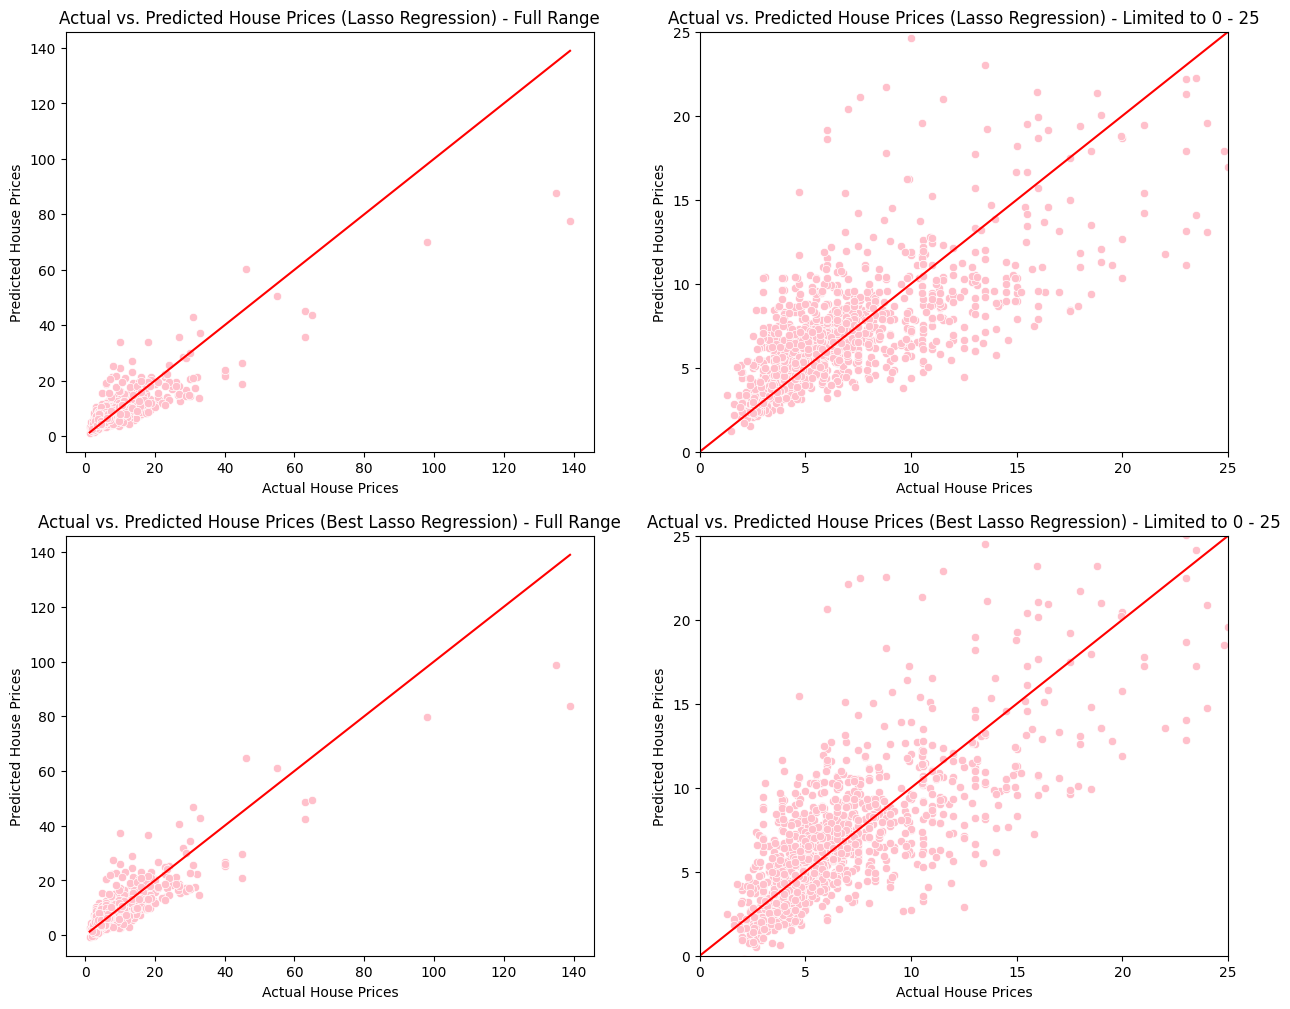

In [58]:
# # Create a scatter plot
# fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# # Plot for Lasso Regression
# sns.scatterplot(x = y_test, y = lasso_y_pred, color = 'pink', ax=axes[0])
# axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'deeppink', linestyle = '-')
# axes[0].set_title('Actual vs. Predicted House Prices (Lasso Regression)')
# axes[0].set_xlabel('Actual House Prices')
# axes[0].set_ylabel('Predicted House Prices')

# # Plot for Best Lasso Regression
# sns.scatterplot(x = y_test, y = lasso_y_pred_best, color = 'pink', ax=axes[1])
# axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'deeppink', linestyle = '-')
# axes[1].set_title('Actual vs. Predicted House Prices (Best Lasso Regression)')
# axes[1].set_xlabel('Actual House Prices')
# axes[1].set_ylabel('Predicted House Prices')


# plt.grid(False)
# plt.show()

# Create a scatter plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot for Lasso Regression full range
sns.scatterplot(x = y_test, y = lasso_y_pred, color = 'pink', ax=axes[0,0])
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '-')
axes[0,0].set_title('Actual vs. Predicted House Prices (Lasso Regression) - Full Range')
axes[0,0].set_xlabel('Actual House Prices')
axes[0,0].set_ylabel('Predicted House Prices')
axes[0,0].grid(False)

# Plot for Lasso Regression limited 
sns.scatterplot(x = y_test, y = lasso_y_pred, color = 'pink', ax=axes[0,1])
axes[0,1].plot([0, 25], [0, 25], color = 'red', linestyle = '-')
axes[0,1].set_title('Actual vs. Predicted House Prices (Lasso Regression) - Limited to 0 - 25')
axes[0,1].set_xlabel('Actual House Prices')
axes[0,1].set_ylabel('Predicted House Prices')
axes[0,1].set_xlim(0, 25)
axes[0,1].set_ylim(0, 25)
axes[0,1].grid(False)


# Plot for Best Lasso Regression full range
sns.scatterplot(x = y_test, y = lasso_y_pred_best, color = 'pink', ax=axes[1,0])
axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '-')
axes[1,0].set_title('Actual vs. Predicted House Prices (Best Lasso Regression) - Full Range')
axes[1,0].set_xlabel('Actual House Prices')
axes[1,0].set_ylabel('Predicted House Prices')
axes[1,0].grid(False)

# Plot for Best Lasso Regression limited
sns.scatterplot(x = y_test, y = lasso_y_pred_best, color = 'pink', ax=axes[1,1])
axes[1,1].plot([0, 25], [0, 25], color = 'red', linestyle = '-')
axes[1,1].set_title('Actual vs. Predicted House Prices (Best Lasso Regression) - Limited to 0 - 25')
axes[1,1].set_xlabel('Actual House Prices')
axes[1,1].set_ylabel('Predicted House Prices')
axes[1,1].set_xlim(0, 25)
axes[1,1].set_ylim(0, 25)
axes[1,1].grid(False)


plt.grid(False)
plt.show()

### **Compare 3 Regression models**

In [59]:
# Tạo bảng so sánh
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'MAE': [mean_absolute_error(y_test, y_test_pred_custom), mean_absolute_error(y_test, ridge_y_pred_best), mean_absolute_error(y_test, lasso_y_pred_best)],
    'MSE': [mean_squared_error(y_test, y_test_pred_custom), mean_squared_error(y_test, ridge_y_pred_best), mean_squared_error(y_test, lasso_y_pred_best)],
    'R^2': [r2_score(y_test, y_test_pred_custom), r2_score(y_test, ridge_y_pred_best), r2_score(y_test, lasso_y_pred_best)]
})

print(results)

               Model       MAE        MSE       R^2
0  Linear Regression  2.562495  18.391198  0.759335
1   Ridge Regression  2.537368  18.498624  0.757930
2   Lasso Regression  2.515700  18.413086  0.759049


**Conclusion**

Vì Linear Regression có các metrics tốt nhất trong 3 mô hình regression nên chọn Linear Regression làm baseline model cho đồ án này

### 1. Tổng quan về Linear Regression

Linear Regression (Hồi quy tuyến tính) là một phương pháp thống kê dùng để mô hình hóa mối quan hệ giữa một biến phụ thuộc (dependent variable) và một hoặc nhiều biến độc lập (independent variables). Phương pháp này cố gắng tìm ra một đường thẳng (đối với hồi quy tuyến tính đơn) hoặc một mặt phẳng (đối với hồi quy tuyến tính bội) sao cho tổng bình phương các sai số giữa giá trị thực tế và giá trị dự đoán là nhỏ nhất.

### 2. Lí do chọn mô hình

Linear Regression là một trong những mô hình học máy cơ bản và phổ biến nhất vì:
- **Đơn giản và dễ hiểu**: Mô hình dễ triển khai và giải thích kết quả.
- **Nhanh chóng và hiệu quả**: Thời gian tính toán nhanh chóng và có thể hoạt động tốt trên các tập dữ liệu nhỏ và vừa.
- **Đánh giá tuyến tính**: Hữu ích khi cần đánh giá và mô hình hóa mối quan hệ tuyến tính giữa các biến.
- **Độ chính xác tốt với dữ liệu đơn giản**: Khi dữ liệu có mối quan hệ tuyến tính rõ ràng, hồi quy tuyến tính có thể đạt được độ chính xác cao.

### 3. Cách thức hoạt động của Linear Regression

Linear Regression hoạt động theo các bước sau:
1. **Thu thập dữ liệu**: Thu thập dữ liệu bao gồm biến phụ thuộc \(y\) và các biến độc lập \(X\).
2. **Ước lượng hệ số**: Sử dụng phương pháp Ordinary Least Squares (OLS) để ước lượng các hệ số hồi quy \( \beta \). Phương pháp này cố gắng giảm thiểu tổng bình phương sai số (Residual Sum of Squares - RSS).
   - Công thức tổng quát cho hồi quy tuyến tính đơn: \( y = \beta_0 + \beta_1 x + \epsilon \)
   - Công thức tổng quát cho hồi quy tuyến tính bội: \( y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon \)
3. **Dự đoán**: Sử dụng các hệ số ước lượng để dự đoán giá trị của biến phụ thuộc.
4. **Đánh giá mô hình**: Đánh giá hiệu suất của mô hình bằng các chỉ số như \(R^2\), MSE (Mean Squared Error), RMSE (Root Mean Squared Error), v.v.

### 4. Ưu điểm và nhược điểm của Linear Regression

#### Ưu điểm

- **Đơn giản và dễ hiểu**: Mô hình hồi quy tuyến tính dễ hiểu và dễ triển khai.
- **Nhanh chóng và hiệu quả**: Mô hình có thể được tính toán nhanh chóng và hiệu quả, đặc biệt là trên các tập dữ liệu nhỏ và vừa.
- **Khả năng diễn giải**: Hệ số của mô hình cung cấp thông tin về mức độ ảnh hưởng của từng biến độc lập lên biến phụ thuộc.
- **Không yêu cầu nhiều tài nguyên tính toán**: Hồi quy tuyến tính không yêu cầu nhiều tài nguyên tính toán so với các mô hình phức tạp hơn.

#### Nhược điểm

- **Giả định về tuyến tính**: Mô hình giả định rằng mối quan hệ giữa các biến độc lập và biến phụ thuộc là tuyến tính, điều này không luôn đúng trong thực tế.
- **Nhạy cảm với outliers**: Mô hình có thể bị ảnh hưởng mạnh bởi các giá trị ngoại lai (outliers).
- **Giả định về phân phối lỗi**: Hồi quy tuyến tính giả định rằng các lỗi có phân phối chuẩn và độc lập với nhau, điều này không luôn đúng.
- **Không phù hợp với dữ liệu phi tuyến**: Mô hình không hoạt động tốt với dữ liệu có mối quan hệ phi tuyến giữa các biến.
